# K-Means Clustering - Unsupervised ML

# Vishal Shaw

In [78]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [77]:
# Storing the data file into a variable 
iris = pd.read_csv("https://raw.githubusercontent.com/ShawVishal/Predict-K-mean-clusters/master/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [79]:
# replacing the 'Species' column with numbers for each unique values

iris['Species'] = pd.factorize(iris.Species)[0]
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


Text(0.5, 1.0, 'Petal Length vs Petal Width')

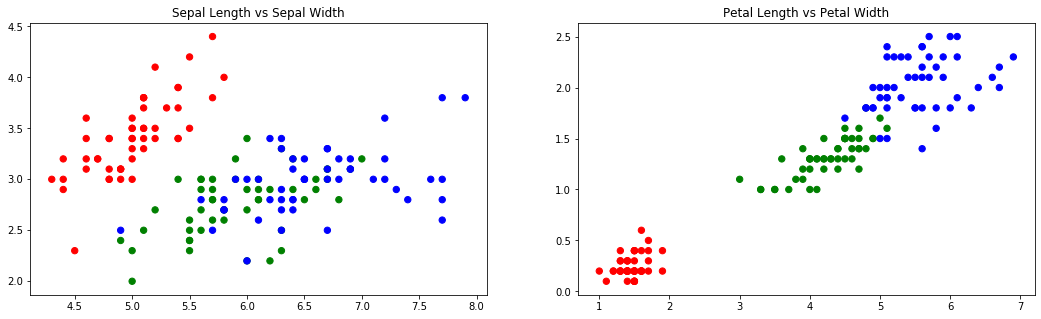

In [80]:
# visualizing the data to find pattern
plt.figure(figsize=(18,5))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

# Drawing a Scatter plot for Sepal Length vs Sepal Width
plt.subplot(1, 2, 1)
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c=colors[iris['Species']], s=40)
plt.title('Sepal Length vs Sepal Width')

# Drawing a Scatter plot for Petal Length vs Petal Width
plt.subplot(1,2,2)
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], c=colors[iris['Species']], s=40)
plt.title('Petal Length vs Petal Width')

In [93]:
# Defining target and predictors for sepal as it looks more mixed

x = iris.iloc[:, 1:3]
y = iris['Species']

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

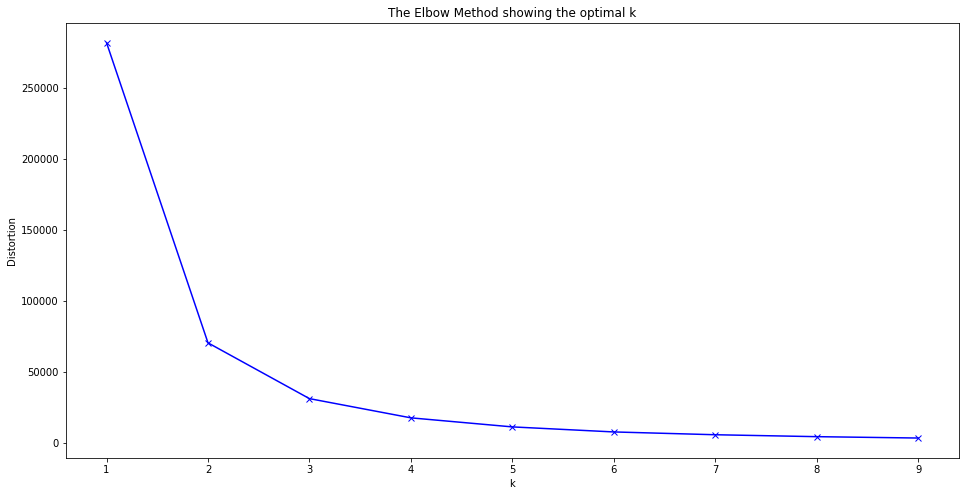

In [94]:
# We can see differnt clusters but we can use the elbow method to detrime the value of 'k' just to be sure
# The distortion starts to decrease in a linear fashion after hitting the opptimal 'k' value or the elbow

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(iris)
    distortions.append(kmeanModel.inertia_)
    
# Plotting the distortion against 'k' 
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [96]:
# running our model with 'k' value as 3

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
# identifying the centroids coordinates
centers = kmeanModel.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [6.81276596 3.07446809]
 [5.006      3.418     ]]


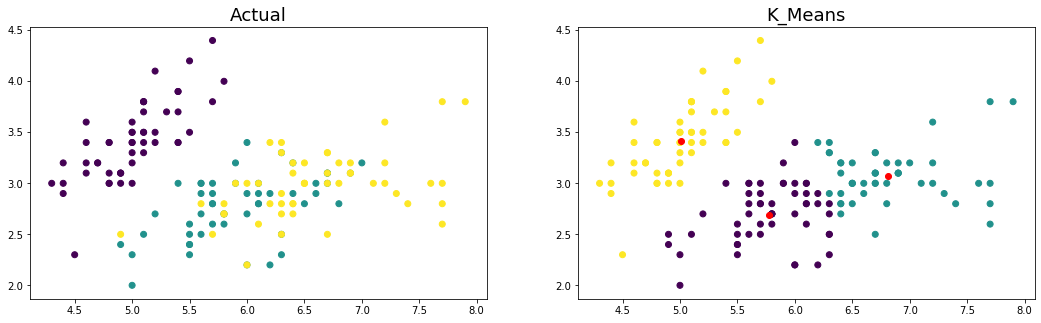

In [113]:
#comparing our actual data against kmeans clustered with centroids in red
iris['k_means']=kmeanModel.predict(x)
fig, axes = plt.subplots(1, 2, figsize=(18,5))
axes[0].scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c=iris['Species'])
axes[1].scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c=iris['k_means'])
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)
axes[1].scatter(centers[:,0], centers[:,1], c='red')